<a href="https://colab.research.google.com/github/1970332/IAyRN/blob/main/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5: Uso de software para búsqueda.

Andy Alexander López Ovalle 1970332 Hora: N4 a N6

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2588 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0604 - accuracy: 0.9811
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9721
Exactitud del modelo en datos de prueba: 0.972100019454956
1/1 [==============================] - 0s 28ms/step


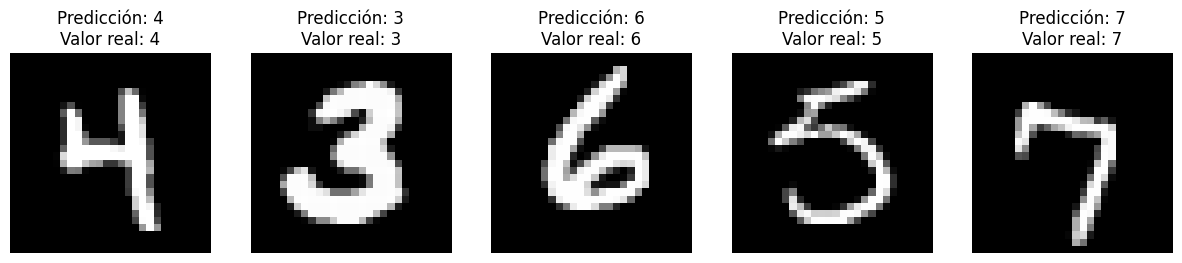

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Carga del conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos
train_data = train_data / 255.0
test_data = test_data / 255.0

# Definir la estructura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_data, train_labels, epochs=5)


test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)

# Realizar predicciones y mostrar las imágenes
num_predicciones = 5
indices_aleatorios = np.random.choice(test_data.shape[0], num_predicciones, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(1, num_predicciones, i + 1)
    plt.imshow(test_data[idx], cmap='gray')
    plt.axis('off')
    # Realizar la predicción
    prediction = model.predict(np.expand_dims(test_data[idx], axis=0))
    predicted_label = np.argmax(prediction)
    actual_label = test_labels[idx]
    plt.title(f"Predicción: {predicted_label}\nValor real: {actual_label}")

plt.show()
